# Homework Assignment 4

#### Due: Friday April 6th, 11:59pm.

Save your file in **mp248/Assignment.4/Assignment.4.ipynb** on your Bitbucket repository.


#### Problem 1:

For this problem, we ask you to consider the single pendulum and double pendulums with friction, from *Dynamic.plots.1.ipynb* and *Dynamic.plots.2.ipynb*.   

(a) In *Dynamic.plots.1.ipynb* the single pendulum differential equation had the two system constants, $a \geq 0$ is what we called the *friction constant*, and $b > 0$ is the *mass/gravity constant*.  The differential equation had the form $\theta'' + a \theta' + b \sin \theta = 0$.   The *total energy* of the system is

$$E_{tot} = (\theta')^2 + 2b -2b\cos\theta$$

For the simulation to be accurate, the total energy of the system should dissipate according to the heat loss through friction. Thus we should have equality

$$\frac{dE}{dt} = -2a(\theta')^2$$

We call the right hand side of this equation the *theoretical power loss of the system*. If $E(t_i)$ represents the actual total energy of the system at time $t_i$, then the *actual power loss between frames* $t_i$ and $t_{i+1}$ would be the quantity $\frac{E(t_{i+1})-E(t_i)}{t_{i+1} - t_i} = \frac{\Delta E}{\Delta t}$. 

For the system with $a=0.1$, $b=1$, $\theta_0 = 0$ and $\theta'_0=10$, create a plot with one slider controlling the time step.  In your plot, show $\theta(t)$ as a function of time. In a text field (in the plot) present the maximum (absolute value) of the difference between the theoretical $-2a(\theta')^2$ power and the actual power loss $\frac{\Delta E}{\Delta t}$ between frames of the animation.  Call this quantity the power-loss-deviation (PLD) of the simulation, i.e. in your plot you should have a text field "MAX PLD: number". 

Ensure your time interval is long enough so that one can see the pendulum coming to rest (let's define this to be $E_{tot}(t_i) < 0.1$) for $t_i$ at the end of your interval.  

(b) Determine the how small $\Delta t$ needs to be to ensure the maximum PLD is less than *1.0*.

(c) A properly simulated solution to this differential equation has a horizontal asymptote an integer multiple of $2\pi$.  How small does $\Delta t$ need to be to discover the correct asymptote, and what is the asymptote?


In [1]:

import tqdm
import time as ti ## lets us have delays

for i in tqdm.tqdm(range(12)):
    ti.sleep(0.5)

100%|██████████| 12/12 [00:06<00:00,  1.99it/s]


In [2]:
## GUI version -- needs widgets
for i in tqdm.tqdm_notebook(range(12)):
    ti.sleep(0.5)

HBox(children=(IntProgress(value=0, max=12), HTML(value='')))

In [59]:
%matplotlib nbagg  
##matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Slider
#from matplotlib.widgets import TextBox
from scipy.integrate import odeint

import matplotlib.animation as animation

In [60]:
#initial conditions:
tmax =150
n = 1000
dt = tmax/n
a, b = 0.1, 1
y0 = [0,10]
t = np.linspace(0,tmax,n)
k= 0
y=y0

In [61]:
def pend(y, t,b, c): 
    th, tp = y
    dydt = [tp, -b*tp-c*np.sin(th)]
    return dydt

In [62]:

sols = odeint(pend, y, t, args = (a,b))
print(sols[4], sols[5])
#y = sols[1]

[ 5.76453001  9.41631503] [ 7.16837675  9.25046719]


first we need to graph the function that will be traced out.

In [63]:

#tarr = arange(0,5*dt, dt)
#inst_sols = odeint(pend, y0, tarr, args = (a,b))
#print(inst_sols)

#thi = [inst_sols[-2]]
#thf = [inst_sols[-1]] 

#Et = th


TH.append(TH[-1]+3)
TH

[0, 3, 6, 9, 12]

<IPython.core.display.Javascript object>


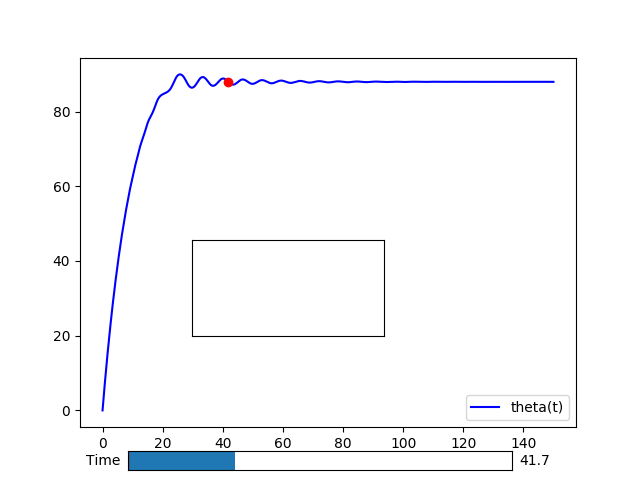

0

In [89]:
fig, ax = plt.subplots()
#x = np.arange(0, 2*np.pi, 0.01)
#ax.plot(x, np.sin(x))

ax.plot(t, sols[:, 0], 'b', label = 'theta(t)')
#ax.plot(t, sols[:, 1], 'g', label = 'theta prime(t)')
ax.legend()

pt, = ax.plot(0, 0, 'ro')

PLDbox = plt.axes([0.3, 0.3, 0.3 , 0.2])
PLDbox.get_xaxis().set_visible(False)
PLDbox.get_yaxis().set_visible(False)
#PLDbox.text(0.3,0.5,'Max PLD = 04')


T = [0]
TH = [[0,10]]

#def animate(t,th):
   # pt.set_xdata(t)
   # pt.set_ydata(th)

    
def update(t):
    T.append(t)
    inst_sols = odeint(pend, TH[-1], [T[-2], t], args = (a,b))
    print(inst_sols)
    TH.append(inst_sols[1])
    pt.set_xdata(t)
    pt.set_ydata(inst_sols[1][0])
    
   # tpi = inst_sols[-1]
   # tpf = inst_sols[-2]
   # Eexp = abs((tpf[1]**2-2*b*np.cos(tpf[0]) +2*b) - (tpi[1]**2-2*b*np.cos[tpi[0]] +2*b) ) /dt
   # Eth = -2*a*tpf[1]**2
   # PLD_max = abs(Eexp - Eth)
   # PLDbox.clear()
   # PLDbox.text(0.3,0.5,'Max PLD = 04')
   # PLDbox.text(0.4,0.5, str(PLD_max))
    
time = plt.axes([0.2, 0.02, 0.6, 0.04])
time_slide = Slider(time, 'Time', 0, tmax, valinit =0, valfmt= '%0.1f')
time_slide.on_changed(update)

    
    

In [88]:
print(T[-1])

8.250000000000009


now we add the point

In [54]:
animate([0,10],)

and now we want to retrace out the steps. Start with defining an animate function that will move the dot one step forwards. We set its new x values to i, and its new y values to the corresponding solutions to sols(i)

In [61]:
fig, ax = plt.subplots()
#x = np.arange(0, 2*np.pi, 0.01)
#ax.plot(x, np.sin(x))

ax.plot(t, sols[:, 0], 'b', label = 'theta(t)')
#ax.plot(t, sols[:, 1], 'g', label = 'theta prime(t)')
ax.legend()

pt, = ax.plot(0, 0, 'ro')

PLDbox = plt.axes([0.3, 0.3, 0.3 , 0.2])
PLDbox.get_xaxis().set_visible(False)
PLDbox.get_yaxis().set_visible(False)
#PLDbox.text(0.3,0.5,'Max PLD = 04')

y=y0


def animate(t,th):
    pt.set_xdata(t)
    pt.set_ydata(th)

    
def update(t):
    tarr = arange(0,t,dt)
    inst_sols = odeint(pend, y0, tarr, args = (a,b))
    animate(t, inst_sols[-1][0])
    
    tpi = inst_sols[-1]
    tpf = inst_sols[-2]
    Eexp = abs((tpf[1]**2-2*b*np.cos(tpf[0]) +2*b) - (tpi[1]**2-2*b*np.cos[tpi[0]] +2*b) ) /dt
    Eth = -2*a*tpf[1]**2
    PLD_max = abs(Eexp - Eth)
    PLDbox.clear()
    PLDbox.text(0.3,0.5,'Max PLD = 04')
    PLDbox.text(0.4,0.5, str(PLD_max))
    
time = plt.axes([0.2, 0.02, 0.6, 0.04])
time_slide = Slider(time, 'Time', 0, tmax, valinit =0, valfmt= '%0.1f')
time_slide.on_changed(update)

    
    

now we draw the slider which determines the value of i in animate

<IPython.core.display.Javascript object>


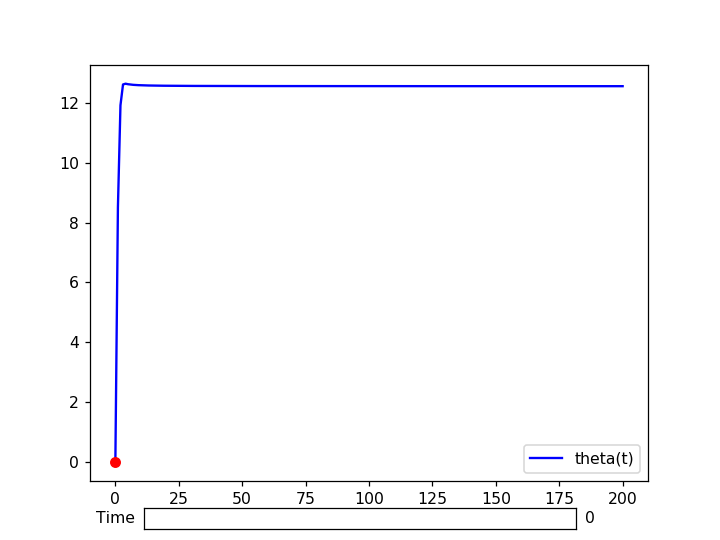

0

In [41]:
fig, ax = plt.subplots()
#x = np.arange(0, 2*np.pi, 0.01)
#ax.plot(x, np.sin(x))

ax.plot(t, sols[:, 0], 'b', label = 'theta(t)')
#ax.plot(t, sols[:, 1], 'g', label = 'theta prime(t)')
ax.legend()

pt, = ax.plot(0, 0, 'ro')

def animate(i):
    pt.set_xdata(i)
    pt.set_ydata(sols[i,0])
    
def update(i):
    animate(int(i))
    
time = plt.axes([0.2, 0.02, 0.6, 0.04])
time_slide = Slider(time, 'Time', 0, tmax, valinit = 0, valfmt = '%0.d')
time_slide.on_changed(update)

    
    

0

now we create an update function that changes the value to be inputted into animate, based on the slider value

In [160]:
print(PLDS)


[]


#### Problem 2: 

We roughly repeat Problem 1, but for the double pendulum.  For this problem we ask you to extend the code from *Dynamic.plots.2.ipynb*.

(a) Make a plot of $\theta_1$ and $\theta_2$ vs. $t$ for the double pendulum with initial conditions 
$$ \theta_1(0) = \pi \hskip 1cm \theta_2(0) = 0$$
$$ \theta_1'(0) = 0 \hskip 1cm \theta_2'(0) = 10$$
$$m_1 = 1 \hskip 1cm m_2 = 1$$
$$r_1 = 1 \hskip 1cm r_2 = 1$$
$$k_1 \ 0.1 \hskip 1cm k_2 = 0.1$$
$$ g = 10$$

Have a slider that controls the number of steps in the numerical integration.   Have your plot run long-enough so that the asymptotic behaviour of $\theta_1$ and $\theta_2$ is apparent, in particular both trend towards integer multiples of $2 \pi$.

(b) How small does $\Delta t$ need to be to see this asymptotic behaviour reliably, and what are the integer multiples for $\theta_1$ and $\theta_2$ respectively? 


In [2]:
import sympy as sp

m1, m2, k1, k2, r1, r2, g, t = sp.symbols("m_1 m_2 k_1 k_2 r_1 r_2 g t")
## theta_i we give symbol ti
t1 = sp.Function("θ_1")(t)
t2 = sp.Function("θ_2")(t)
w1 = sp.Derivative(t1, t)
w2 = sp.Derivative(t2, t)

ti = sp.Function("θ_i")(t)
wi = sp.Derivative(ti, t)

R = sp.Function("R")
L = sp.Function("L")

T, V = sp.symbols("T V")

In [4]:
Teq = sp.Eq(T, (1/2)*m1*r1**2*w1**2 + \
            m2*r1*r2*w1*w2*sp.cos(t1-t2)+ \
            (1/2)*m2*r1**2*w1**2+ \
            (1/2)*m2*r2**2*w2**2)
## we forgot the 3rd term in class!
#sp.pprint(Teq)

In [5]:
Veq = sp.Eq(V, -m1*g*r1*sp.cos(t1) - \
            m2*g*(r1*sp.cos(t1)+r2*sp.cos(t2)))
#sp.pprint(Veq)

V = -g⋅m₁⋅r₁⋅cos(θ₁(t)) - g⋅m₂⋅(r₁⋅cos(θ₁(t)) + r₂⋅cos(θ₂(t)))


In [8]:
## lagrangian

Leq = sp.Eq(L, Teq.args[1] - Veq.args[1])
#print("Lagrangian")
#sp.pprint(Leq)

In [10]:
Req = sp.Eq(R, (1/2)*k1*w1**2 + (1/2)*k2*(w2-w1)**2)
#sp.pprint(Req)
    

In [11]:
## i = 1
LEM1 = (-sp.Derivative(Leq.args[1], t1) +\
        sp.Derivative(Req.args[1], w1) + sp.Derivative(Leq.args[1], w1, t)).doit().simplify()
LEM2 = (-sp.Derivative(Leq.args[1], t2) +\
        sp.Derivative(Req.args[1], w2) + sp.Derivative(Leq.args[1], w2, t)).doit().simplify()

In [13]:
## solve for theta_1'' and theta_2''
SOL = sp.solve((LEM1, LEM2), sp.Derivative(t1, t, 2), sp.Derivative(t2, t, 2))
#sp.pprint(SOL)

In [14]:
T1pp = SOL[sp.Derivative(t1,t,2)].simplify()
T2pp = SOL[sp.Derivative(t2,t,2)].simplify()

In [15]:
## As a test to see if these ODEs have no mistakes
##  dE/dt = -2R

test=sp.Derivative(Teq.args[1]+Veq.args[1], t).doit().simplify()
test=test.xreplace({sp.Derivative(t1,t,2): T1pp, sp.Derivative(t2,t,2): T2pp})
test = test.simplify()
sp.pprint( (test + 2*Req.args[1]).simplify() )

0


In [16]:
## We want to make this into a callable function of theta_1, theta_2, theta_1', theta_2'
## and we want it to be reasonably fast. 

## technique 1: subst and evalf() very slow
## technique 2: lambdify in sympy
## technique 3 (new): is called ufuncify  -- we will use this. 

## first step is to replace all occurences of theta_1(t) as fcn of time with dummy variable
## similarly replace theta_1'(t) with dummy variable

w1, w2, t1, t2 = sp.symbols("w_1 w_2 t_1 t_2")

xT1pp = T1pp
xT1pp = xT1pp.xreplace({sp.Derivative(sp.Function("θ_1")(t), t): w1, \
                        sp.Derivative(sp.Function("θ_2")(t), t): w2, \
                        sp.Function("θ_1")(t): t1, \
                        sp.Function("θ_2")(t): t2})
xT2pp = T2pp
xT2pp = xT2pp.xreplace({sp.Derivative(sp.Function("θ_1")(t), t): w1, \
                        sp.Derivative(sp.Function("θ_2")(t), t): w2, \
                        sp.Function("θ_1")(t): t1, \
                        sp.Function("θ_2")(t): t2})

In [17]:
## let's make it callable
## t1pp will be a callable function and you give it arguments
## r1 -- distance from the first bearing to the 2nd -- 1st arm length
## r2 -- distance from 2nd bearing to end of pendulum -- 2nd arm length

from sympy.utilities.autowrap import ufuncify
t1pp = ufuncify([r1,r2,m1,m2,k1,k2,t1,t2,w1,w2,g], xT1pp)
t2pp = ufuncify([r1,r2,m1,m2,k1,k2,t1,t2,w1,w2,g], xT2pp)

## TH = (theta1, theta2, theta1', theta2')

def theODE(TH, t, r1, r2, m1, m2, k1, k2, g):
    return [TH[2], TH[3], \
            t1pp(r1, r2, m1, m2, k1, k2, TH[0], TH[1], TH[2], TH[3], g), \
            t2pp(r1, r2, m1, m2, k1, k2, TH[0], TH[1], TH[2], TH[3], g)]

In [44]:
#initial conditions
TH = [np.pi, 0, 0, 10]
m1, m2 = 1, 1
r1, r2 = 1, 1
k1, k2 = 0.1, 0.1
g = 10
tmax = 100
n = 100
t2 = linspace(0,tmax, n)
dt = tmax/n

In [45]:
sols_2 = odeint(theODE, TH, t2, args = (r1,r2,m1,m2,k1,k2,g) )
print(sols_2[1])

[-2.43379028  6.25166185 -0.88026468  7.78362843]


<IPython.core.display.Javascript object>


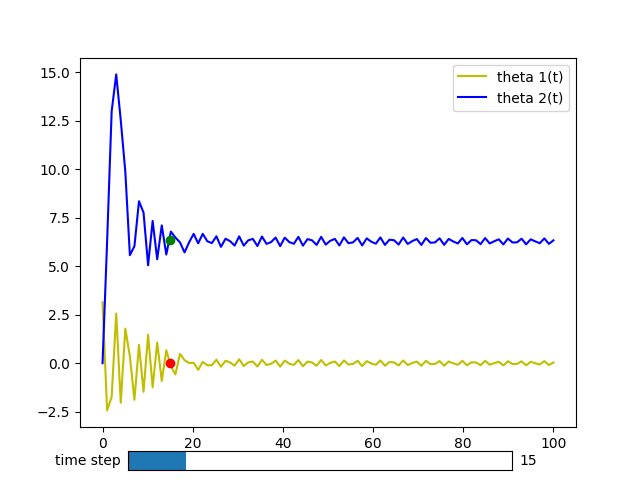

[-2.43379028  6.25166185 -0.88026468  7.78362843]


In [50]:
fig2, ax = plt.subplots()
#x = np.arange(0, 2*np.pi, 0.01)
#ax.plot(x, np.sin(x))



def animate(i):

    plt.plot(i, inst_sols2[-1][0])
print(sols_2[1])

def update2(i):
    t2 = arange(0,i,dt)
    inst_sols2 = odeint(theODE, TH, t2, args = (r1,r2,m1,m2,k1,k2,g))
    pt2.set_xdata(i)
    pt3.set_ydata(sols_2[-1][0])
    
    pt3.set_xdata(i)
    pt3.set_ydata(sols_2[-1][1])
    

    

steps = plt.axes([0.2, 0.02, 0.6, 0.04])
time_step = Slider(steps, 'time step', 0, tmax, valinit = 0, valfmt = '%0.d')
time_step.on_changed(update2)

ax.plot(t2, sols_2[:, 0], 'y', label = 'theta 1(t)')
ax.plot(t2, sols_2[:, 1], 'b', label = 'theta 2(t)')

pt2, = ax.plot(0, 0, 'ro')
pt3, = ax.plot(sols_2[0][1],0 , 'go')
ax.legend()

    
    

In [49]:
update2(2)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  del sys.path[0]


$\theta_1$ trends to $0\pi$ and $\theta_2$ trends to $2\pi$, provided $\Delta t < 40/3000$. 

#### Problem 3: 

We want to analyze and model the wave data from Lab 3 in Part I in more detail. Read the data as you did in Lab 3. The data has now changed because we are at a different date. Recall that each row contains a number of quantaties for each hour of each day over the past three weeks. Here we are interested in the distrubution of wind speeds and if and how they correlate with wave heights.

**3.1**

Read the data and make a histogram of the wind speed using $n = 10$ bins. Print a formatted statement specifying the mean of the wind speed distribution.

**3.2**

Normalize the data so that the integral of the histogram is unity. Fit the normalized wind speed distribution with a the probability density function of a standard normal distribution. Plot the normalized data and the probability density function.

**3.3**

Plot the wave height vs. wind speed. Using your own Pearson's r coefficient function determine that coefficient for the data sets wind speed and waveheight. A simply model may predict that once the wind starts increasing it may take a while for the wave height to follow. Modify your plot of wave height vs. wind speed so that it can apply an `hour_offset` so that you plot the wave height at `t + hour_offset` vs. windspeed at time `t` (remember that in the data file the latest measurements are in the top row and following rows go backward in time). 

**3.4**

Determine Pearson's r coefficient for `hour_offset` in the range `[0,10]`. Plot Pearson's r coefficient against `hour_offset`. Overplot a least-square fit of a $4^{th}$ order polynomial. Print a formatted sentence that states the value of the `hour_offset` for the maximum correlation between wave height vs. wind speed. (Do not read off the maximum, but use a an expression that will alway print the right off set no matter what the data set is. Remember it changes every day!).